In [1]:
import calendar
import datetime
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
tf.random.set_seed(42)
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam 

##### loading data

In [2]:
df = pd.read_csv('/cxldata/datasets/project/ny_stock_prediction/prices-split-adjusted.csv', header = 0)

In [3]:
df.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


##### Checking the shape of the data set

In [4]:
df.shape

(851264, 7)

##### checking the uniques sample in the data set

In [5]:
df.symbol.unique()

array(['WLTW', 'A', 'AAL', 'AAP', 'AAPL', 'ABC', 'ABT', 'ACN', 'ADBE',
       'ADI', 'ADM', 'ADP', 'ADS', 'ADSK', 'AEE', 'AEP', 'AES', 'AET',
       'AFL', 'AGN', 'AIG', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALK', 'ALL',
       'ALXN', 'AMAT', 'AME', 'AMG', 'AMGN', 'AMP', 'AMT', 'AMZN', 'AN',
       'ANTM', 'AON', 'APA', 'APC', 'APD', 'APH', 'ARNC', 'ATVI', 'AVB',
       'AVGO', 'AVY', 'AWK', 'AXP', 'AYI', 'AZO', 'BA', 'BAC', 'BAX',
       'BBBY', 'BBT', 'BBY', 'BCR', 'BDX', 'BEN', 'BHI', 'BIIB', 'BK',
       'BLK', 'BLL', 'BMY', 'BSX', 'BWA', 'BXP', 'C', 'CA', 'CAG', 'CAH',
       'CAT', 'CB', 'CBG', 'CBS', 'CCI', 'CCL', 'CELG', 'CERN', 'CF',
       'CHD', 'CHK', 'CHRW', 'CI', 'CINF', 'CL', 'CLX', 'CMA', 'CMCSA',
       'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP', 'COF', 'COG', 'COH',
       'COL', 'COO', 'COP', 'COST', 'CPB', 'CRM', 'CSCO', 'CSX', 'CTAS',
       'CTL', 'CTSH', 'CTXS', 'CVS', 'CVX', 'CXO', 'D', 'DAL', 'DD', 'DE',
       'DFS', 'DG', 'DGX', 'DHI', 'DHR', 'DIS', 'DISCA', 'DISCK', 

##### grouping yahoo stock from Nasqd

In [6]:
df_yahoo = df[df['symbol']=='YHOO']

In [7]:
df_yahoo.head(10)

,date,symbol,open,close,low,high,volume
713,2010-01-04,YHOO,16.940001,17.100000,16.879999,17.200001,16587400.0
1181,2010-01-05,YHOO,17.219999,17.230000,17.000000,17.230000,11718100.0
1649,2010-01-06,YHOO,17.170000,17.170000,17.070000,17.299999,16422000.0
2117,2010-01-07,YHOO,16.809999,16.700001,16.570000,16.900000,31816300.0
2585,2010-01-08,YHOO,16.680000,16.700001,16.620001,16.760000,15470000.0
3053,2010-01-11,YHOO,16.770000,16.740000,16.480000,16.830000,16181900.0
3521,2010-01-12,YHOO,16.650000,16.680000,16.600000,16.860001,15672400.0
3989,2010-01-13,YHOO,16.879999,16.900000,16.650000,16.980000,16955600.0
4457,2010-01-14,YHOO,16.809999,17.120001,16.799999,17.230000,16715600.0
4925,2010-01-15,YHOO,17.250000,16.820000,16.750000,17.250000,18415000.0


In [8]:
df_yahoo.shape

(1762, 7)

In [9]:
df_yahoo.describe()

,open,close,low,high,volume
count,1762.000000,1762.000000,1762.000000,1762.000000,1.762000e+03
mean,27.297917,27.291992,26.975602,27.609977,1.996907e+07
std,11.412612,11.406846,11.289736,11.526101,1.376851e+07
min,11.300000,11.090000,11.090000,11.800000,2.586900e+06
25%,15.950000,15.920000,15.770000,16.110001,1.235152e+07
50%,26.770001,26.750000,26.495000,27.105001,1.639070e+07
75%,37.335000,37.377501,36.897501,37.689999,2.325988e+07
max,52.279999,52.369999,51.639999,52.619999,2.338721e+08


In [10]:
df_yahoo.isnull().sum()

date      0
symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64

In [11]:
df_yahoo['date'] = pd.to_datetime(df_yahoo['date'])

/usr/local/anaconda/envs/tensorflow2/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [12]:
print(df_yahoo.date.dtype)

datetime64[ns]


In [13]:
df_yahoo = df_yahoo.set_index("date")

In [14]:
df_yahoo.head(5)

,symbol,open,close,low,high,volume
date,,,,,,
2010-01-04,YHOO,16.940001,17.100000,16.879999,17.200001,16587400.0
2010-01-05,YHOO,17.219999,17.230000,17.000000,17.230000,11718100.0
2010-01-06,YHOO,17.170000,17.170000,17.070000,17.299999,16422000.0
2010-01-07,YHOO,16.809999,16.700001,16.570000,16.900000,31816300.0
2010-01-08,YHOO,16.680000,16.700001,16.620001,16.760000,15470000.0


In [15]:
df_yahoo.shape

(1762, 6)

#### setting the frequency to business day

In [16]:
yahoo_data = df_yahoo.asfreq('b')

In [17]:
print(yahoo_data.shape)

(1825, 6)


In [18]:
yahoo_data.tail(30)

,symbol,open,close,low,high,volume
date,,,,,,
2016-11-21,YHOO,41.439999,41.110001,40.939999,41.480000,11338000.0
2016-11-22,YHOO,41.200001,41.009998,40.830002,41.400002,8881200.0
2016-11-23,YHOO,40.910000,40.959999,40.549999,40.980000,3634900.0
2016-11-24,NaN,NaN,NaN,NaN,NaN,NaN
2016-11-25,YHOO,41.080002,40.869999,40.709999,41.080002,2586900.0
2016-11-28,YHOO,40.849998,41.450001,40.740002,41.700001,6765800.0
2016-11-29,YHOO,41.430000,41.599998,41.119999,41.830002,7246100.0
2016-11-30,YHOO,41.619999,41.020000,40.880001,41.669998,7624500.0
2016-12-01,YHOO,41.000000,39.630001,39.529999,41.040001,12614600.0


In [19]:
yahoo_data.isnull().sum()

symbol    63
open      63
close     63
low       63
high      63
volume    63
dtype: int64

##### dealing with missing values 

In [20]:
null_data = yahoo_data[yahoo_data.isnull().any(axis=1)]

In [21]:
null_data.head()

,symbol,open,close,low,high,volume
date,,,,,,
2010-01-18,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-15,NaN,NaN,NaN,NaN,NaN,NaN
2010-04-02,NaN,NaN,NaN,NaN,NaN,NaN
2010-05-31,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-05,NaN,NaN,NaN,NaN,NaN,NaN


##### getting the list of the null data

In [22]:
null_dates = null_data.index.tolist()

##### function for holidays

In [23]:
holidays = []

for date in null_dates:
    week, day, month, year = date.weekday(), date.day, date.month, date.year
    week_day = calendar.day_name[week]

    if month==1:
        if day==1:
            # New year day
            holidays.append(date)
        elif day==2 and week_day=='Monday':
            # Observed New Year Day
            holidays.append(date)
        elif day>=15 and day<=21 and week_day=='Monday':
            # Martin Luther King, Jr. Day
            holidays.append(date)

    elif month==2:
        # Washington's Birthday
        if day>=15 and day<=21 and week_day=='Monday':
            holidays.append(date)

    elif month==5:
        # Memorial day
        if day>=25 and day<=31 and week_day=='Monday':
            holidays.append(date)

    elif month==7:
        # Independence day
        if day==4:
            holidays.append(date)
        # Observed Independence  Day
        elif day==5 and week_day=='Monday':
            holidays.append(date)
        elif day==3 and week_day=='Friday':
            holidays.append(date)

    elif month == 9:
        # Labour day
        if day>=1 and day<=7 and week_day=='Monday':
            holidays.append(date)

    elif month==11:
        # Thanksgiving Day
        if week_day=='Thursday' and day>=22 and day<=28:
            holidays.append(date)

    elif month==12:
        # Christmas Day
        if day==25:
            holidays.append(date)
        # Observed Christmas Day
        elif day==24 and week_day=='Friday':
            holidays.append(date)
        elif day==26 and week_day=='Monday':
            holidays.append(date)

good_fridays = [ datetime.date(2010,4,2), datetime.date(2011,4,22), datetime.date(2012,4,6), datetime.date(2013,3,29), datetime.date(2014,4,18), datetime.date(2015,4,3), datetime.date(2016,3,25) ]
holidays = holidays + [pd.to_datetime(date) for date in good_fridays]

non_holidays = [x for x in null_dates if x not in holidays]
print(non_holidays)

[Timestamp('2012-10-29 00:00:00'), Timestamp('2012-10-30 00:00:00')]


In [24]:
print(yahoo_data.shape)

(1825, 6)


In [25]:
modified_df = yahoo_data.drop(holidays)

In [26]:
modified_df.shape

(1764, 6)

##### filling missing values

In [27]:
print("Before filling missing values:\n", modified_df.isna().sum())

Before filling missing values:
 symbol    2
open      2
close     2
low       2
high      2
volume    2
dtype: int64


In [28]:
modified_df = modified_df.bfill(axis='rows')

In [29]:
print("After filling missing values:\n", modified_df.isna().sum())

After filling missing values:
 symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64


##### Visualizing  of prices of stock at different time interval

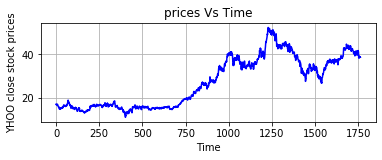

In [30]:
def plotter(code):
    global closing_stock
    plt.subplot(211)
    company_close = modified_df[modified_df['symbol']==code]
    company_close = company_close.close.values.astype('float32')
    company_close = company_close.reshape(-1, 1)
    closing_stock = company_close
    plt.xlabel('Time')
    plt.ylabel(code + " close stock prices")
    plt.title('prices Vs Time')
    plt.grid(True)
    plt.plot(company_close , 'b')
    plt.show()

plotter("YHOO")

##### splitting data set

In [31]:
n_train = int(len(closing_stock) * 0.80)
n_remaining = int(len(closing_stock) - n_train)

In [32]:
n_val = int(n_remaining*0.50)
n_test = n_remaining - n_val

In [33]:
print("n_train_samples:", n_train, "Validation:", n_val, "Test_samples:", n_test)

n_train_samples: 1411 Validation: 176 Test_samples: 177


#### saving data as traindata

In [34]:
train_data = closing_stock[0:n_train]
print(train_data.shape)

(1411, 1)


##### saving data as validation data

In [35]:
val_data = closing_stock[n_train:n_train + n_val]
print(val_data)

[[37.15]
 [36.03]
 [34.49]
 [35.93]
 [36.24]
 [36.1 ]
 [35.69]
 [35.19]
 [34.1 ]
 [32.93]
 [31.31]
 [31.74]
 [32.52]
 [33.69]
 [33.14]
 [32.24]
 [31.6 ]
 [31.77]
 [32.54]
 [31.58]
 [30.9 ]
 [31.52]
 [31.15]
 [31.43]
 [30.32]
 [31.04]
 [31.4 ]
 [30.93]
 [30.74]
 [31.17]
 [30.4 ]
 [29.74]
 [29.34]
 [29.13]
 [27.6 ]
 [28.26]
 [28.91]
 [28.91]
 [30.71]
 [30.85]
 [30.96]
 [31.87]
 [32.37]
 [32.52]
 [32.86]
 [32.34]
 [32.09]
 [33.48]
 [33.37]
 [33.5 ]
 [32.83]
 [31.12]
 [31.67]
 [33.17]
 [33.4 ]
 [34.3 ]
 [35.19]
 [35.05]
 [35.62]
 [35.27]
 [34.72]
 [35.07]
 [35.12]
 [34.2 ]
 [33.68]
 [33.99]
 [33.38]
 [33.23]
 [32.19]
 [32.95]
 [32.86]
 [32.98]
 [32.63]
 [33.11]
 [33.36]
 [32.96]
 [33.16]
 [32.94]
 [33.81]
 [33.71]
 [35.65]
 [34.34]
 [34.91]
 [34.68]
 [34.85]
 [34.4 ]
 [34.63]
 [32.91]
 [32.59]
 [33.03]
 [33.78]
 [33.23]
 [32.95]
 [32.97]
 [34.19]
 [34.45]
 [34.11]
 [33.6 ]
 [34.04]
 [33.37]
 [33.26]
 [31.4 ]
 [32.2 ]
 [32.16]
 [30.16]
 [30.63]
 [30.17]
 [30.69]
 [29.44]
 [30.32]
 [29.14]
 

##### Test

In [36]:
test_data = closing_stock[n_train + n_val:]
print(test_data)

[[37.67]
 [37.48]
 [37.23]
 [37.11]
 [36.95]
 [36.59]
 [36.6 ]
 [36.53]
 [36.01]
 [36.  ]
 [36.94]
 [37.23]
 [37.18]
 [37.44]
 [37.37]
 [37.03]
 [36.48]
 [37.48]
 [37.27]
 [37.24]
 [37.02]
 [36.5 ]
 [36.66]
 [37.53]
 [35.59]
 [36.76]
 [37.82]
 [37.94]
 [36.65]
 [37.15]
 [36.6 ]
 [37.07]
 [36.73]
 [36.97]
 [37.35]
 [36.83]
 [36.47]
 [37.4 ]
 [37.32]
 [37.39]
 [36.94]
 [37.29]
 [37.4 ]
 [37.36]
 [37.78]
 [36.24]
 [35.22]
 [36.04]
 [36.86]
 [37.56]
 [37.99]
 [37.5 ]
 [37.51]
 [37.52]
 [37.74]
 [37.96]
 [37.89]
 [37.64]
 [37.96]
 [37.72]
 [37.95]
 [38.17]
 [38.9 ]
 [38.85]
 [39.38]
 [38.32]
 [38.76]
 [38.66]
 [38.52]
 [38.19]
 [38.8 ]
 [38.57]
 [38.39]
 [38.92]
 [38.99]
 [39.24]
 [39.24]
 [39.93]
 [41.27]
 [42.94]
 [42.67]
 [42.49]
 [42.7 ]
 [42.9 ]
 [43.02]
 [42.52]
 [42.6 ]
 [41.91]
 [42.03]
 [42.27]
 [42.26]
 [42.58]
 [42.75]
 [42.93]
 [43.28]
 [44.71]
 [44.35]
 [44.36]
 [42.92]
 [43.46]
 [43.04]
 [43.46]
 [43.99]
 [43.67]
 [43.19]
 [42.79]
 [44.14]
 [44.15]
 [42.8 ]
 [42.29]
 [43.37]
 

##### scaling data set to 0 and 1

In [37]:
scaler = MinMaxScaler(feature_range=(0,1))

In [38]:
train = scaler.fit_transform(train_data)
val = scaler.transform(val_data)
test = scaler.transform(test_data)

##### Creating a data set using function

In [39]:
def create_dataset(data , n_features):
    dataX, dataY = [], []
    for i in range(len(data)-n_features-1):
        a = data[i:(i+n_features), 0]
        dataX.append(a)
        dataY.append(data[i + n_features, 0])
    return np.array(dataX), np.array(dataY)

In [40]:
n_features = 2

In [41]:
trainX, trainY = create_dataset(train, n_features)
valX, valY = create_dataset(val, n_features)
testX, testY = create_dataset(test, n_features)

##### getting the shape of the dataset

In [42]:
print(trainX.shape , trainY.shape , valX.shape , valY.shape, testX.shape , testY.shape)

(1408, 2) (1408,) (173, 2) (173,) (174, 2) (174,)


In [43]:
trainX = trainX.reshape(trainX.shape[0] , 1 ,trainX.shape[1])
valX = valX.reshape(valX.shape[0] , 1 ,valX.shape[1])
testX = testX.reshape(testX.shape[0] , 1 ,testX.shape[1])

###### shape of train data

In [44]:
print(trainX.shape , trainY.shape , valX.shape , valY.shape, testX.shape , testY.shape)

(1408, 1, 2) (1408,) (173, 1, 2) (173,) (174, 1, 2) (174,)


### Building the Model

In [45]:
model = tf.keras.Sequential()

#### adding layers to the model

In [46]:
# First GRU layer
model.add(layers.GRU(units=100, return_sequences=True, input_shape=(1,n_features), activation='tanh'))
model.add(layers.Dropout(0.2))

# Second GRU layer
model.add(layers.GRU(units=150, return_sequences=True, input_shape=(1,n_features), activation='tanh'))
model.add(layers.Dropout(0.2))

# Third GRU layer
model.add(layers.GRU(units=100, activation='tanh'))
model.add(layers.Dropout(0.2))

# The output layer
model.add(layers.Dense(units=1, kernel_initializer='he_uniform', activation='linear'))

##### compiling the model

In [47]:
model.compile(optimizer=Adam(lr=0.0005), loss='mean_squared_error',metrics=['mean_squared_error'])

In [48]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 1, 100)            31200     
_________________________________________________________________
dropout (Dropout)            (None, 1, 100)            0         
_________________________________________________________________
gru_1 (GRU)                  (None, 1, 150)            113400    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 150)            0         
_________________________________________________________________
gru_2 (GRU)                  (None, 100)               75600     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 1

In [49]:
history = model.fit(trainX, trainY, epochs=100, verbose=1, batch_size=128, validation_data=(valX, valY))

Train on 1408 samples, validate on 173 samples
Epoch 1/100
1408/1408 [==============================] - 6s 4ms/sample - loss: 0.1346 - mean_squared_error: 0.1346 - val_loss: 0.0960 - val_mean_squared_error: 0.0960
Epoch 2/100
1408/1408 [==============================] - 0s 83us/sample - loss: 0.0408 - mean_squared_error: 0.0408 - val_loss: 0.0012 - val_mean_squared_error: 0.0012
Epoch 3/100
1408/1408 [==============================] - 0s 81us/sample - loss: 0.0254 - mean_squared_error: 0.0254 - val_loss: 7.2355e-04 - val_mean_squared_error: 7.2355e-04
Epoch 4/100
1408/1408 [==============================] - 0s 87us/sample - loss: 0.0130 - mean_squared_error: 0.0130 - val_loss: 0.0044 - val_mean_squared_error: 0.0044
Epoch 5/100
1408/1408 [==============================] - 0s 85us/sample - loss: 0.0055 - mean_squared_error: 0.0055 - val_loss: 5.2540e-04 - val_mean_squared_error: 5.2540e-04
Epoch 6/100
1408/1408 [==============================] - 0s 87us/sample - loss: 0.0027 - mean_squa

In [50]:
import math

In [55]:
def model_score(model, X_train, y_train, X_val, y_val , X_test, y_test):
    print('Train Score:')
    train_score = model.evaluate(X_train, y_train, verbose=0)
    print("MSE: {:.5f} , RMSE: {:.2f}".format(train_score[0], math.sqrt(train_score[0])))

    print('Validation Score:')
    val_score = model.evaluate(X_val, y_val, verbose=0)
    print("MSE: {:.5f} , RMSE: {:.2f}".format (val_score[0], math.sqrt(val_score[0])))

    print('Test Score:')
    test_score = model.evaluate(X_test, y_test, verbose=0)
    print("MSE: {:.5f} , RMSE: {:.2f}".format (test_score[0], math.sqrt(test_score[0])))


model_score(model, trainX, trainY ,valX, valY , testX, testY)

Train Score:
MSE: 0.00021 , RMSE: 0.01
Validation Score:
MSE: 0.00034 , RMSE: 0.02
Test Score:
MSE: 0.00028 , RMSE: 0.02


In [58]:
print(history.history.keys())

dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])


##### visualizing

dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])


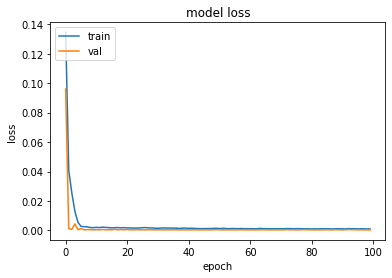

In [62]:
print(history.history.keys())

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

##### predicting the model

In [64]:
pred = model.predict(testX)

In [66]:
pred = scaler.inverse_transform(pred)

In [67]:
testY_actual = testY.reshape(testY.shape[0], 1)
testY_actual = scaler.inverse_transform(testY_actual)
print(testY_actual[:10])

[[37.23]
 [37.11]
 [36.95]
 [36.59]
 [36.6 ]
 [36.53]
 [36.01]
 [36.  ]
 [36.94]
 [37.23]]


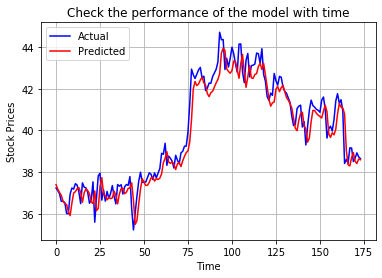

In [68]:
plt.plot(testY_actual , 'b')
plt.plot(pred , 'r')

plt.xlabel('Time')
plt.ylabel('Stock Prices')
plt.title('Check the performance of the model with time')
plt.legend(['Actual', 'Predicted'], loc='upper left')

plt.grid(True)
plt.show()